Простые НС и метод обратного распространения ошибки
1. Реализовать полносвязную сеть: два скрытых слоя с функцией активации ReLU, на выходе softmax по количеству классов (задается как параметр).
2. Обучить НС на модельный датасет "make_moons" из skelarn. Визуализировать разделяющую поверхность.
3. Обучить НС на датасете MNIST.

In [163]:
from sklearn.datasets import make_moons

In [420]:
x, y = make_moons(n_samples=1000, noise=0.05)

In [306]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [372]:
x.shape

(500, 2)

In [373]:
colors = np.array(['#377eb8', '#ff7f00'])

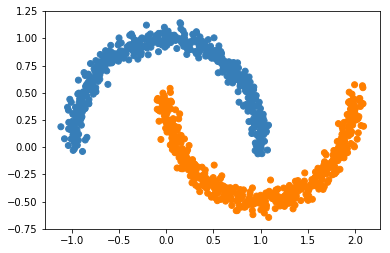

In [421]:
plt.scatter(x[:,0], x[:,1], color=colors[y])

In [396]:
from sklearn.model_selection import train_test_split

In [426]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [441]:
mean = np.mean(x_train, axis=0)

In [442]:
mean

array([0.50632381, 0.24609653])

In [443]:
x_train1 = x_train - mean


In [444]:
x_test1 = x_test - mean

In [423]:
np.unique(y)

array([0, 1], dtype=int64)

In [424]:
colors2 = np.array(['#4daf4a', '#f781bf'])

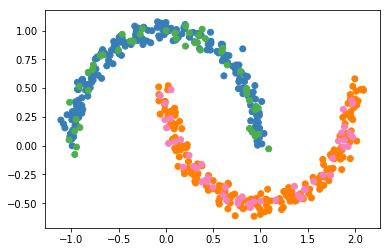

In [398]:
plt.scatter(x_train[:,0], x_train[:,1], color=colors[y_train])
plt.scatter(x_test[:,0], x_test[:,1], color=colors2[y_test])

In [399]:
from keras.models import Sequential
from keras.layers import Dense, Activation


In [332]:
from keras import regularizers


In [445]:
nn = Sequential()
nn.add(Dense(50, input_dim=2, activation='relu', kernel_regularizer=regularizers.l2(0.00)) )
nn.add(Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.00)))
nn.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.00)))
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = nn.fit(x_train, y_train, batch_size=16, epochs=100,verbose=0, validation_data=(x_test, y_test))

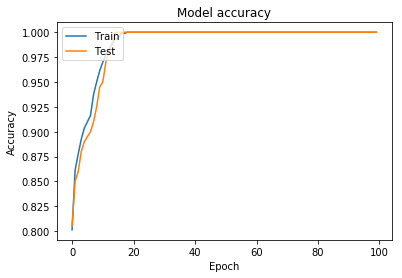

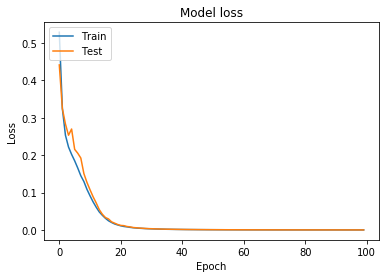

In [446]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [447]:
y_pred = logr.predict(x_test)

In [448]:
y_pred.shape

(200, 1)

Украдем функцию из лекции

In [451]:
def plot_model_results(decision):
    x_min, x_max, y_min, y_max = -2, 2.5, -1, 2
    x, y = np.mgrid[x_min:x_max:0.01, y_min:y_max:0.01]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y
    pos_lin = pos.reshape(pos.shape[0] * pos.shape[1], 2)
    pred_lin = decision(pos_lin)
    pred = pred_lin.reshape(pos.shape[0], pos.shape[1])

    fig, ax = plt.subplots()
    ax.set_xlim((x_min, x_max))
    ax.set_ylim((y_min, y_max))
    ax.contour(x, y, pred, levels=[0.5])


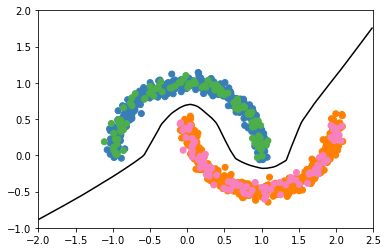

In [453]:
plot_model_results(nn.predict)
plt.scatter(x_train[:,0], x_train[:,1], color=colors[y_train])
plt.scatter(x_test[:,0], x_test[:,1], color=colors2[y_test])

В принципе определили довольно точно

Для начала потренируемся на простой модели для mnist

In [94]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()


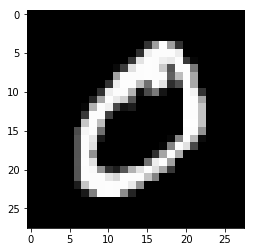

In [95]:
plt.figure()
plt.imshow(x_train[1])
plt.gray()
plt.grid(False)
plt.show()

In [96]:
from keras.layers import Flatten

In [97]:
x_train, x_test = x_train / 255.0, x_test / 255.0


In [99]:

model = Sequential([
 Flatten(input_shape=(28, 28)),
  Dense(1024, input_dim=784,  activation='relu'),
  Dense(1024, input_dim=1024,  activation='relu'),
  Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history  = model.fit(x_train, y_train, batch_size=16, epochs=5, validation_data=(x_test, y_test), verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 226us/step - loss: 0.1890 - acc: 0.9422 - val_loss: 0.1206 - val_acc: 0.9621
Epoch 2/5
60000/60000 [==============================] - 13s 215us/step - loss: 0.0916 - acc: 0.9724 - val_loss: 0.0968 - val_acc: 0.9716
Epoch 3/5
60000/60000 [==============================] - 13s 215us/step - loss: 0.0671 - acc: 0.9798 - val_loss: 0.1011 - val_acc: 0.9729
Epoch 4/5
60000/60000 [==============================] - 13s 217us/step - loss: 0.0568 - acc: 0.9835 - val_loss: 0.0845 - val_acc: 0.9779
Epoch 5/5
60000/60000 [==============================] - 13s 217us/step - loss: 0.0489 - acc: 0.9857 - val_loss: 0.0951 - val_acc: 0.9766


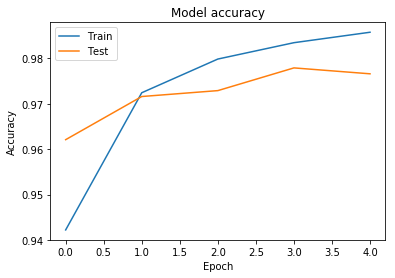

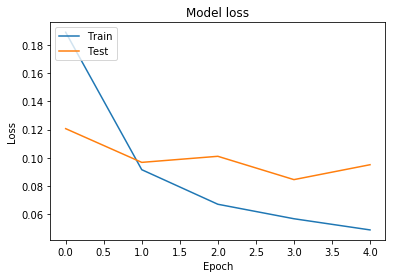

In [102]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


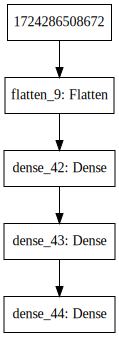

In [106]:
import keras
import pydot as pyd
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

keras.utils.vis_utils.pydot = pyd

#Visualize Model

def visualize_model(model):
  return SVG(model_to_dot(model).create(prog='dot', format='svg'))
#create your model
#then call the function on your model
visualize_model(model)


В принципе результат неплохой, хотя немного и переобучился